In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Data Processing
import pandas as pd

#linear algebra
import numpy as np

#dat visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns

#algorithms
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor

#from xgboost import XGBRegressor 
from sklearn import metrics

In [3]:
df= pd.read_csv('baseball.csv')

In [4]:
df.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
#statistical information
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [6]:
#check unique values in dataset

df.apply(lambda x: len(x.unique()))

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

# Preprocessing the dataset

In [7]:
#checking for the null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [8]:
#check for categorical attribute

cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] =='object':
        cat_col.append(x)
cat_col

[]

The shape of the data frame.

In [4]:
df.shape

(30, 17)

checking for null value

<AxesSubplot:>

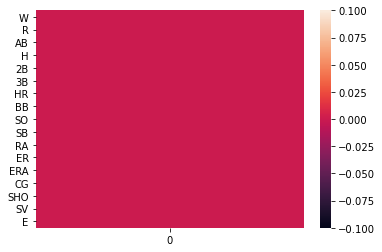

In [5]:
sns.heatmap(df.isnull().sum().to_frame())

# Exploratory Data Analysis

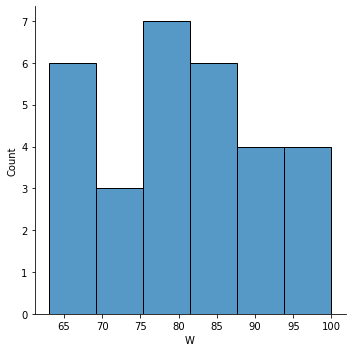

In [9]:
sns.displot(df['W'])

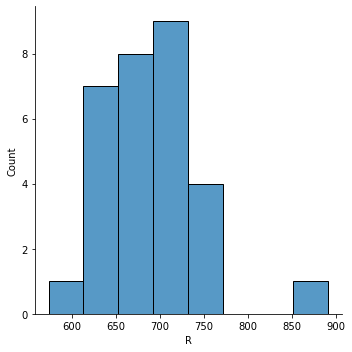

In [11]:
sns.displot(df['R'])

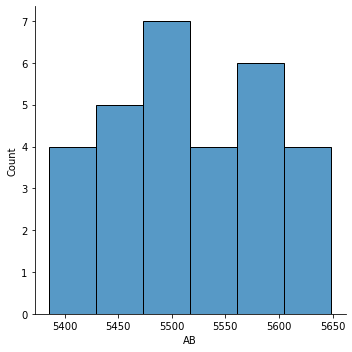

In [12]:
sns.displot(df['AB'])

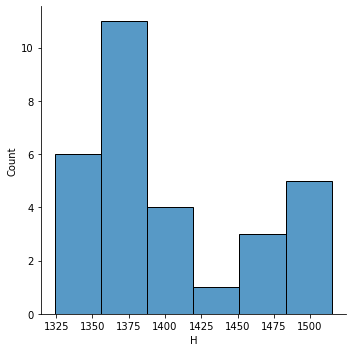

In [13]:
sns.displot(df['H'])

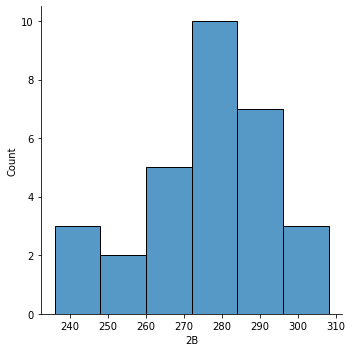

In [14]:
sns.displot(df['2B'])

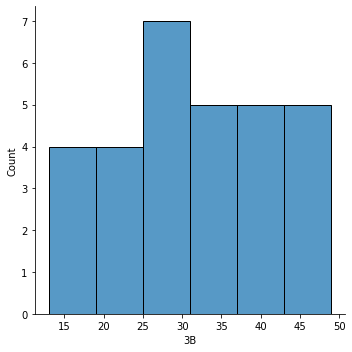

In [15]:
sns.displot(df['3B'])

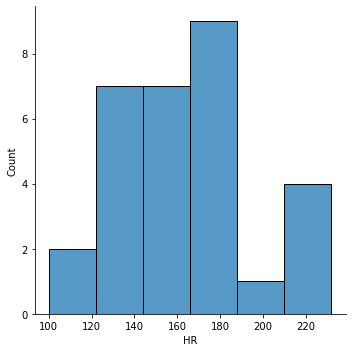

In [16]:
sns.displot(df['HR'])

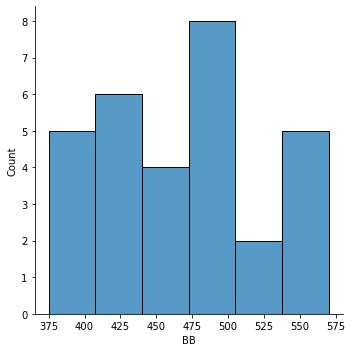

In [17]:
sns.displot(df['BB'])

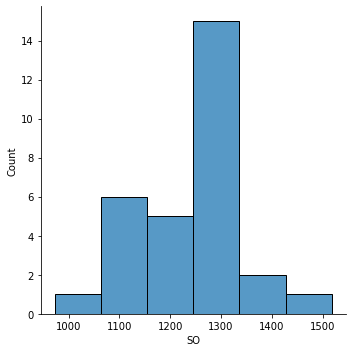

In [18]:
sns.displot(df['SO'])

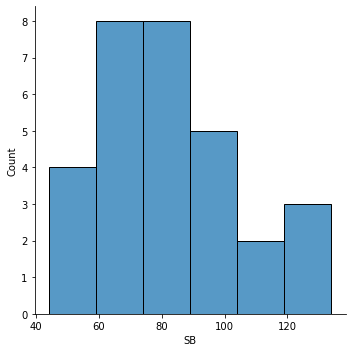

In [19]:
sns.displot(df['SB'])

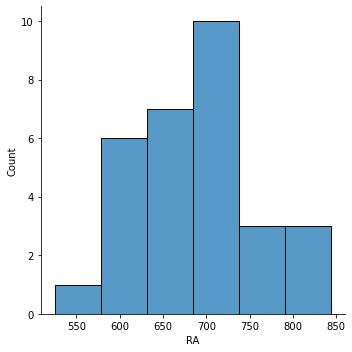

In [20]:
sns.displot(df['RA'])

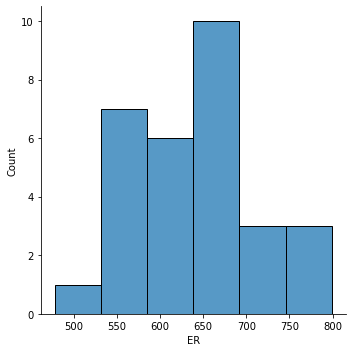

In [21]:
sns.displot(df['ER'])

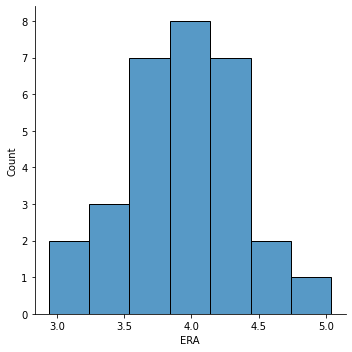

In [22]:
sns.displot(df['ERA'])

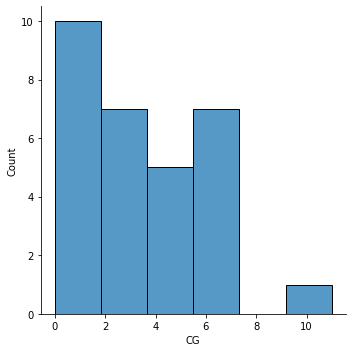

In [23]:
sns.displot(df['CG'])

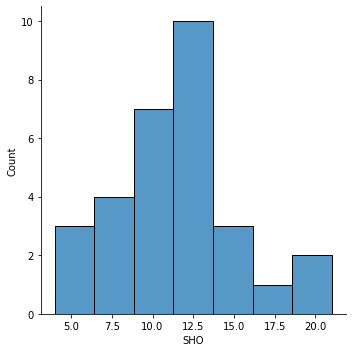

In [24]:
sns.displot(df['SHO'])

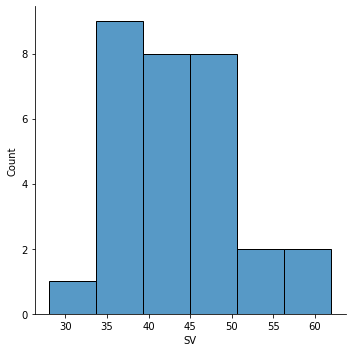

In [25]:
sns.displot(df['SV'])

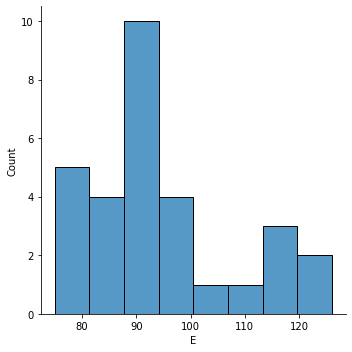

In [26]:
sns.displot(df['E'])

# Coorelation Matrix

<AxesSubplot:>

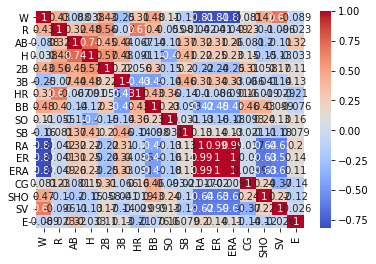

In [30]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# separating the features and target

In [55]:
#X = df.drop(columns=['R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E','W'], axis=1)
X = df.drop(columns=['R','AB','H','3B','SO','RA','ER','ERA','W'], axis=1)
Y = df['W']

In [56]:
print(X)

     2B   HR   BB   SB  CG  SHO  SV    E
0   300  139  383  104   2    8  56   88
1   277  156  439   70   2   12  45   86
2   303  141  533   86  11   10  38   79
3   260  136  404   68   7    9  37  101
4   289  151  455   83   7   12  35   86
5   308  232  570   88   7   10  34   88
6   272  212  554   63   3    4  48   93
7   246  217  418   44   0   10  43   77
8   278  167  436   87   1   12  60   95
9   294  161  478   71   3   10  40   97
10  279  172  503  101   5    9  45  119
11  278  230  486  121   5   13  39   85
12  243  176  435   52   2   12  46   93
13  262  198  478   69   6   12  45   94
14  277  146  475   78   5   15  28  126
15  288  137  506   69   1   15  62   96
16  292  140  461   98   0   13  54  122
17  272  171  567   95   6   21  48  111
18  274  145  412   84   1    7  40  116
19  257  167  496  134   2    8  35   90
20  295  177  488   51   1   14  50   88
21  265  177  539   57   4   13  41   90
22  236  120  375  112   0   12  35   77
23  251  100  47

In [57]:
print(Y)

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64


# Splitting the data into training data and testing data

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [59]:
print(X.shape, X_train.shape, X_test.shape)

(30, 8) (24, 8) (6, 8)


# Model training

# Logistics Regression

In [60]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [61]:
#traing the logistic regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

In [62]:
#accuracy on training data
X_train_prediction = model.predict(X_train)

In [63]:
print(X_train_prediction)

[ 67  87  76  90  93  79  85  74  88  98  74  92  97  81  81  84  63  68
  86  71  68  76 100  80]


In [64]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
training_data_accuracy =accuracy_score(Y_train, X_train_prediction)

In [65]:
print('Accuracy score of the training data',training_data_accuracy)

Accuracy score of the training data 1.0


In [66]:
#accuracy on test data
X_test_prediction = model.predict(X_test)

In [67]:
print(X_test_prediction)

[74 84 76 76 92 79]


In [68]:
test_data_accuracy =accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the training data',test_data_accuracy)

Accuracy score of the training data 0.0


# Stochastic Gradient Descent(SGD)

In [71]:
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
sgd = linear_model.SGDClassifier(max_iter=5,tol =None)
sgd.fit(X_train, Y_train)
Y_pred =sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd =round(sgd.score(X_train,Y_train) *100, 2)

# Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_predition =random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest =round(random_forest.score(X_train, Y_train) *100, 2)

# K Nearest Neighbor:

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)
acc_knn =round(knn.score(X_train, Y_train) *100 , 2)

# Gaussian Naive Bayes

In [76]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train)*100, 2)

# Perceptron

In [77]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train)*100, 2)

# Linear Support Vector Machine

In [78]:
from sklearn.svm import SVC, LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train)*100, 2)

# Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100, 2)

# Which is the best model?

In [80]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, test_data_accuracy, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Naive Bayes
100.00,Decision Tree
75.00,Support Vector Machines
33.33,KNN
8.33,Stochastic Gradient Decent
4.17,Perceptron
0.00,Logistic Regression


from the above we can conclude that Random Forest model, Naive Bayes and Decision Tree are the most accurate models